In [1]:
pip install vaex

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: vaex-jupyter<0.7,>=0.6.0 in c:\users\hp\anaconda3\lib\site-packages (from vaex) (0.6.0)



In [22]:
import vaex
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
import numpy as np


In [2]:
file_path = 'C:/COVID-19_Case_Surveillance_Public_Use_Data_with_Geography.csv'


In [3]:
vaex_df = vaex.from_csv(file_path, 
                        convert=True, 
                        chunk_size=22_00_000)

In [4]:
type(vaex_df)

vaex.dataframe.DataFrameLocal

In [5]:
vaex_df = vaex.open('C:/COVID-19_Case_Surveillance_Public_Use_Data_with_Geography.csv.hdf5')
vaex_df.head()

#,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2021-07,VT,50,WASHINGTON,48477,--,--,--,--,0,nan,Missing,Yes,Laboratory-confirmed case,Asymptomatic,No,Missing,No,--
1,2020-12,MN,27,BROWN,27015,0 - 17 years,--,--,--,0,0,Missing,Yes,Laboratory-confirmed case,Symptomatic,Missing,Missing,No,--
2,2021-03,MI,26,GLADWIN,26051,0 - 17 years,--,--,--,nan,0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,--,--
3,2021-08,OH,39,MERCER,39107,0 - 17 years,--,--,--,0,nan,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,--,--
4,2020-07,KY,21,PERRY,21193,0 - 17 years,--,--,--,nan,0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,--
5,2020-10,CA,6,CALAVERAS,6009,18 to 49 years,--,--,--,nan,0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,--
6,2020-06,CA,6,SISKIYOU,6093,18 to 49 years,--,--,--,nan,0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,No,--
7,2021-04,OR,41,CURRY,41015,50 to 64 years,--,--,--,nan,0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,--
8,2021-08,IL,17,WILLIAMSON,17199,50 to 64 years,Missing,Missing,Missing,nan,0,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,--
9,2021-01,FL,12,CITRUS,12017,0 - 17 years,Female,--,--,nan,0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,--,--


In [6]:
#Selecting Illinois State

Illinios_state_df = vaex_df[vaex_df["res_state"] == "IL"]
Illinios_state_df.head(20)

#,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2021-08,IL,17.0,WILLIAMSON,17199.0,50 to 64 years,Missing,Missing,Missing,nan,0.0,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,--
1,2020-07,IL,17.0,JERSEY,17083.0,18 to 49 years,Female,--,--,nan,0.0,Missing,Yes,Probable Case,Missing,No,Unknown,Unknown,--
2,2020-10,IL,17.0,MORGAN,17137.0,18 to 49 years,Female,Missing,Missing,nan,0.0,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,--
3,2020-12,IL,17.0,CHAMPAIGN,17019.0,18 to 49 years,Male,Missing,Missing,nan,0.0,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,--
4,2020-11,IL,17.0,FAYETTE,17051.0,18 to 49 years,Male,Missing,Hispanic/Latino,nan,0.0,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,2020-12,IL,17.0,MONTGOMERY,17135.0,0 - 17 years,Female,Missing,Missing,nan,0.0,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,Missing,--
16,2020-12,IL,17.0,MCDONOUGH,17109.0,18 to 49 years,Female,--,--,nan,0.0,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,--
17,2020-10,IL,17.0,WOODFORD,17203.0,18 to 49 years,Female,Missing,Missing,nan,0.0,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,--
18,2020-08,IL,17.0,WILL,17197.0,18 to 49 years,Female,Missing,Hispanic/Latino,nan,0.0,Missing,Missing,Probable Case,Missing,Missing,Missing,Missing,--


In [7]:
to_drop = ['case_positive_specimen_interval',
            'case_onset_interval',
            'process',
            'exposure_yn',
            'underlying_conditions_yn',
           'symptom_status',
          ]


Illinios_state_df.drop(to_drop, inplace=True)

#,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,current_status,hosp_yn,icu_yn,death_yn
0,2021-08,IL,17.0,WILLIAMSON,17199.0,50 to 64 years,Missing,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing
1,2020-07,IL,17.0,JERSEY,17083.0,18 to 49 years,Female,--,--,Probable Case,No,Unknown,Unknown
2,2020-10,IL,17.0,MORGAN,17137.0,18 to 49 years,Female,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing
3,2020-12,IL,17.0,CHAMPAIGN,17019.0,18 to 49 years,Male,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing
4,2020-11,IL,17.0,FAYETTE,17051.0,18 to 49 years,Male,Missing,Hispanic/Latino,Laboratory-confirmed case,Missing,Missing,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1,503,853",2020-11,IL,17.0,COOK,17031.0,65+ years,Male,White,Unknown,Laboratory-confirmed case,Missing,Missing,Yes
"1,503,854",2020-11,IL,17.0,COOK,17031.0,65+ years,Male,White,Unknown,Laboratory-confirmed case,Missing,Missing,Missing
"1,503,855",2020-11,IL,17.0,COOK,17031.0,65+ years,Male,White,Unknown,Laboratory-confirmed case,Missing,Missing,Yes
"1,503,856",2020-11,IL,17.0,COOK,17031.0,65+ years,Male,White,Unknown,Laboratory-confirmed case,Missing,Missing,Yes


In [12]:
df_new = Illinios_state_df.dropna()
df_new

#,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,current_status,hosp_yn,icu_yn,death_yn
0,2021-08,IL,17.0,WILLIAMSON,17199.0,50 to 64 years,Missing,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing
1,2020-10,IL,17.0,MORGAN,17137.0,18 to 49 years,Female,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing
2,2020-12,IL,17.0,CHAMPAIGN,17019.0,18 to 49 years,Male,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing
3,2021-08,IL,17.0,ROCK ISLAND,17161.0,0 - 17 years,Female,White,Hispanic/Latino,Probable Case,Missing,Missing,Missing
4,2020-11,IL,17.0,DEKALB,17037.0,18 to 49 years,Female,White,Hispanic/Latino,Laboratory-confirmed case,Missing,Missing,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1,165,348",2020-11,IL,17.0,COOK,17031.0,65+ years,Male,White,Unknown,Laboratory-confirmed case,Missing,Missing,Yes
"1,165,349",2020-11,IL,17.0,COOK,17031.0,65+ years,Male,White,Unknown,Laboratory-confirmed case,Missing,Missing,Missing
"1,165,350",2020-11,IL,17.0,COOK,17031.0,65+ years,Male,White,Unknown,Laboratory-confirmed case,Missing,Missing,Yes
"1,165,351",2020-11,IL,17.0,COOK,17031.0,65+ years,Male,White,Unknown,Laboratory-confirmed case,Missing,Missing,Yes


In [14]:
df_new.export_csv("C:/covid1.csv")

In [89]:
data = pd.read_csv("C:/covid1.csv")
type(data)

pandas.core.frame.DataFrame

In [90]:
data['sex']=np.where(data['sex'] =='Missing', 'Unknown', data['sex'])
data['race']=np.where(data['race'] =='Missing', 'Unknown', data['race'])
data['ethnicity']=np.where(data['ethnicity'] =='Missing', 'Unknown', data['ethnicity'])

In [91]:
data['age_group'].value_counts()

18 to 49 years    648658
50 to 64 years    232545
65+ years         142436
0 - 17 years      141577
Missing              137
Name: age_group, dtype: int64

In [92]:
data['age_group'].unique()

array(['50 to 64 years', '18 to 49 years', '0 - 17 years', '65+ years',
       'Missing'], dtype=object)

In [93]:
data['sex'].value_counts()
data['sex'].unique()

array(['Unknown', 'Female', 'Male'], dtype=object)

In [94]:
data['race'].value_counts()
data['race'].unique()

array(['Unknown', 'White', 'American Indian/Alaska Native', 'Black',
       'Asian', 'Multiple/Other',
       'Native Hawaiian/Other Pacific Islander'], dtype=object)

In [95]:
data['ethnicity'].value_counts()

Non-Hispanic/Latino    592536
Unknown                442506
Hispanic/Latino        130311
Name: ethnicity, dtype: int64

Changing the value names; 

### DATA EXPLORATION

In [96]:
data['current_status'].value_counts()
data['current_status'].unique()

array(['Laboratory-confirmed case', 'Probable Case'], dtype=object)

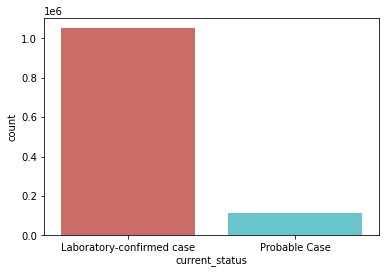

<Figure size 432x288 with 0 Axes>

In [35]:
sns.countplot(x = 'current_status', data = data, palette ='hls')
plt.show()
plt.savefig("count plot")

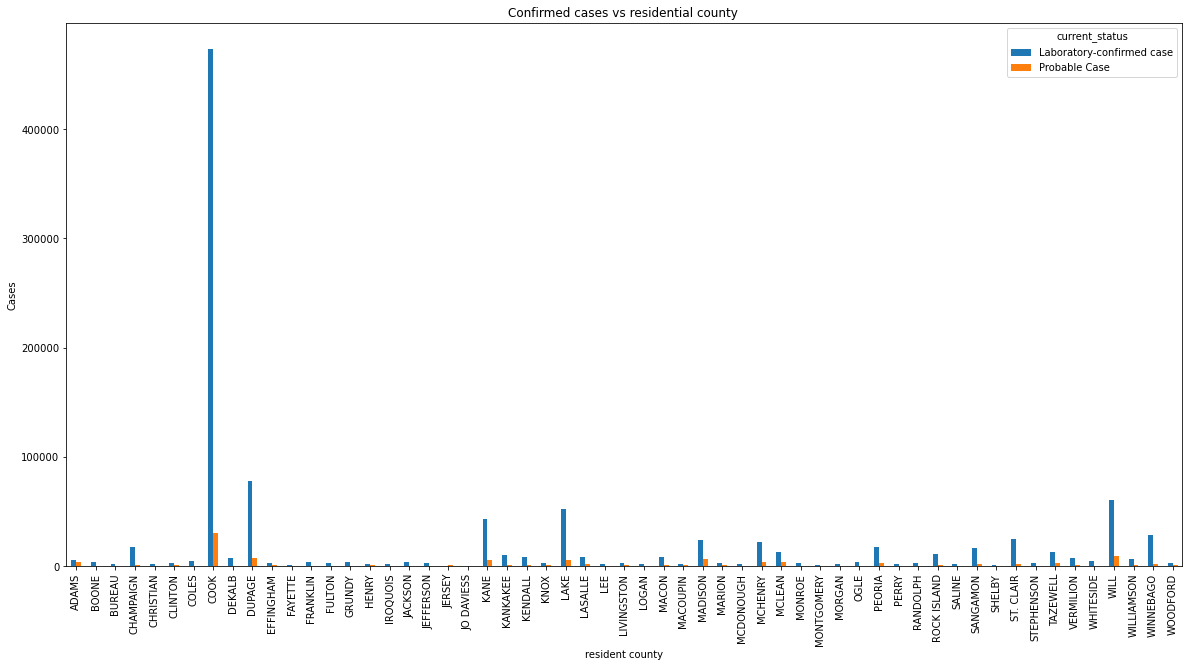

In [39]:
%matplotlib inline

pd.crosstab(data.res_county,data.current_status).plot(kind='bar')
plt.gcf().set_size_inches(20, 10)
plt.title('Confirmed cases vs residential county ')
plt.xlabel('resident county')
plt.ylabel('Cases')
plt.savefig('cases_fre_residence')

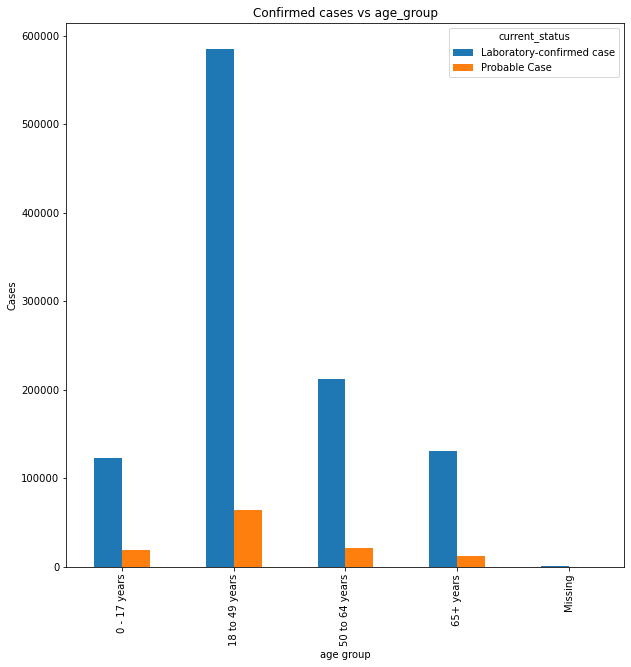

In [40]:
%matplotlib inline

pd.crosstab(data.age_group,data.current_status).plot(kind='bar')
plt.gcf().set_size_inches(10, 10)
plt.title('Confirmed cases vs age_group')
plt.xlabel('age group')
plt.ylabel('Cases')
plt.savefig('cases_fre_age_group')

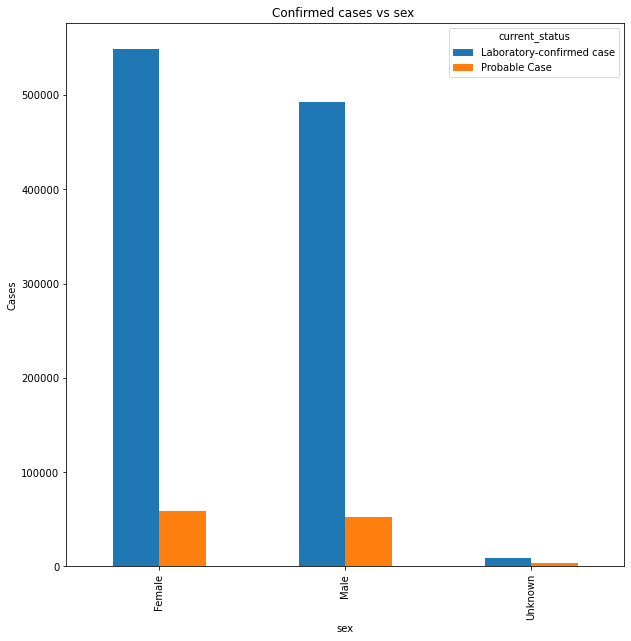

In [41]:
%matplotlib inline

pd.crosstab(data.sex,data.current_status).plot(kind='bar')
plt.gcf().set_size_inches(10, 10)
plt.title('Confirmed cases vs sex ')
plt.xlabel('sex')
plt.ylabel('Cases')
plt.savefig('cases_fre_sex')

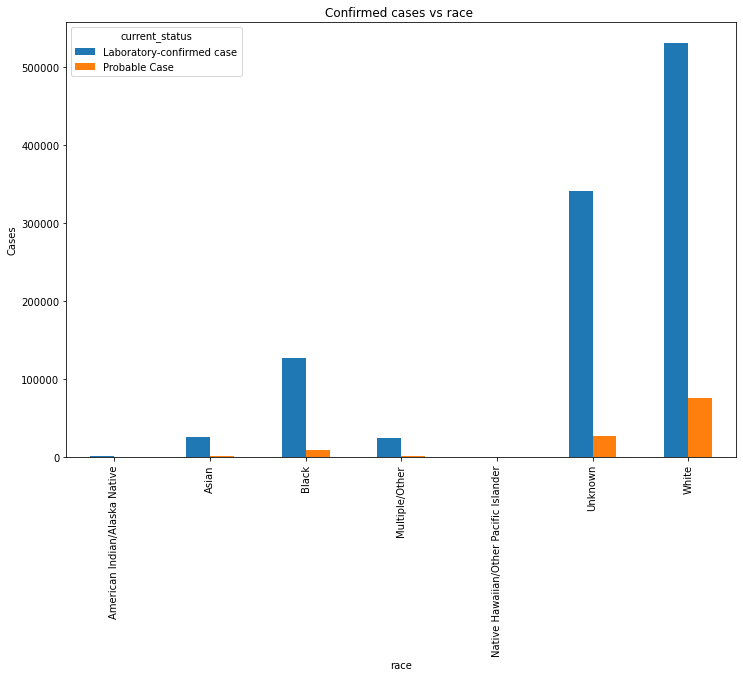

In [42]:
%matplotlib inline

pd.crosstab(data.race,data.current_status).plot(kind='bar')
plt.gcf().set_size_inches(12, 8)
plt.title('Confirmed cases vs race ')
plt.xlabel('race')
plt.ylabel('Cases')
plt.savefig('cases_fre_race')

### Changing categorical into numeric  

In [97]:
data['age_group'].replace(['50 to 64 years', '18 to 49 years', '0 - 17 years', '65+ years',
       'Missing'],
                        [0, 1, 2, 3, 4], inplace=True)
data['sex'].replace(['Unknown', 'Female', 'Male'],
                        [0, 1, 2], inplace=True)

data['race'].replace(['Unknown', 'White', 'American Indian/Alaska Native', 'Black',
       'Asian', 'Multiple/Other',
       'Native Hawaiian/Other Pacific Islander'],
                        [0, 1, 2, 3, 4, 5, 6], inplace=True)
data['current_status'].replace(['Laboratory-confirmed case', 'Probable Case'], [1,0], inplace = True)

In [ ]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']


from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])


# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

In [115]:
data_split = data.sample(frac= 0.1,random_state=200) #splitting the data to increase the time
data_split.reset_index(inplace = True)

In [121]:
for i in range(len(data_split['case_month'])):
    data_split.case_month[i] =  data_split.case_month[i].replace("-","")


<ipython-input-121-83908f6b0c73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_split.case_month[i] =  data_split.case_month[i].replace("-","")


In [158]:
data_split.case_month = pd.to_numeric(data_split.case_month)
data_split.case_month

0         202103
1         202006
2         202012
3         202101
4         202012
           ...  
116530    202004
116531    202104
116532    202107
116533    202012
116534    202012
Name: case_month, Length: 116535, dtype: int64

In [160]:
data_split

,case_month,county_fips_code,age_group,sex,race,current_status
0,202103,17019.0,2,2,3,1
1,202006,17031.0,1,1,3,1
2,202012,17097.0,1,1,1,1
3,202101,17105.0,1,1,1,0
4,202012,17031.0,0,2,3,0
...,...,...,...,...,...,...
116530,202004,17089.0,3,1,1,1
116531,202104,17113.0,2,1,5,1
116532,202107,17001.0,1,1,0,0
116533,202012,17031.0,1,1,0,1


In [166]:
X = data_split.loc[:, data_split.columns != 'current_status']
y = data_split.loc[:, data_split.columns == 'current_status']

In [167]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [168]:
model.fit(X, y)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=0, solver='liblinear')

In [169]:
model.intercept_

array([9.11895973e-09])

In [170]:
model.coef_

array([[ 7.31239357e-05, -7.35966172e-04, -1.86405443e-06,
         3.18403908e-06,  5.29294728e-06]])

In [172]:
model.predict_proba(X)

array([[0.09507577, 0.90492423],
       [0.09645485, 0.90354515],
       [0.1007331 , 0.8992669 ],
       ...,
       [0.09391868, 0.90608132],
       [0.096418  , 0.903582  ],
       [0.09451178, 0.90548822]])

In [178]:
model.predict(X)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [174]:
model.score(X,y)

#90% accuracy 

0.9006221306903506

In [176]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, model.predict(X))

array([[     0,  11581],
       [     0, 104954]], dtype=int64)

Inferences;

1.No true negative predictions: There are none probable case) and predicted correctl

2.No false negative predictions: These are the ones wrongly predicted as probable cases.

3.11581 false positive prediction: There are 11581 observation as a zero that was wrongly predicted as confirmed cases.

4.104954 true positive predictions: The last 104954 observations are ones predicted correctly.

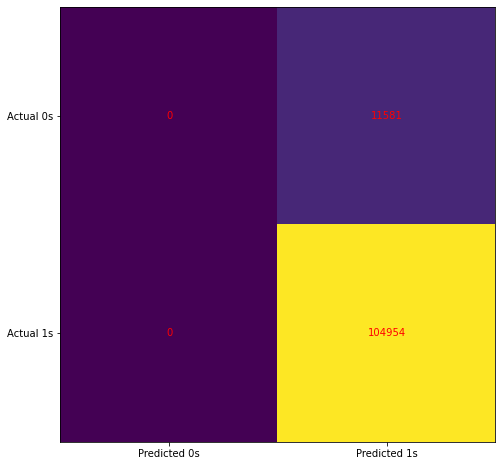

<Figure size 432x288 with 0 Axes>

In [181]:
cm = confusion_matrix(y, model.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
plt.savefig("Confusion_Matrix")

### Correlation Plot  

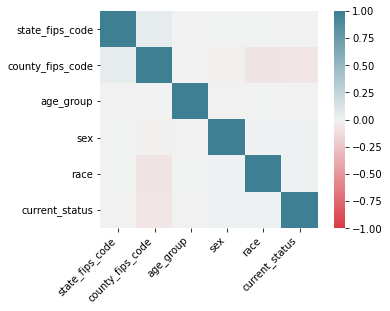

In [74]:
corr = data.corr() 
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.savefig("Correlation_graph")

Inference; 
There is a negative correlation noticed between county_fips_code and current_status.
Also between race and county_fips_code